<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Aula02_Tratamento_em_Base_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula02 - Tratamento de Dados**  
Ulizando a base de dados Churn.csv

Aluno: Jackson da Silva Guedes  
Disciplina: Inteligência Artificial e Ciência de Dados aplicados a Sistemas Elétricos

In [1]:
import pandas as pd # Estaticas descritiva
import seaborn as srn # Visualização dos dados
import statistics as sts

Importando base de dados

In [3]:
dataset = pd.read_csv("Churn.csv", sep=";") # sep -> Vê na base de dados

Visualizando abase de dados

In [4]:
dataset.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [54]:
dataset.shape

(998, 12)

Renomeando as colunas

In [5]:
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo",
                  "Produtos", "TemCartCredito","Ativo","Salario", "Saiu"]

Visualizando

In [6]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Selecionando apenas a coluna **ESTADO**  
Observa-se alguns **OUTLIERS**

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64


<Axes: xlabel='Estado'>

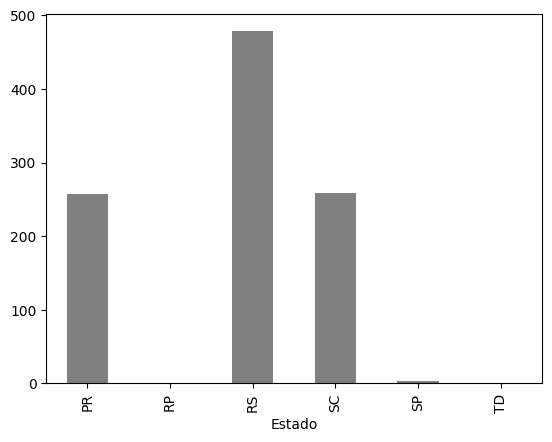

In [7]:
agrupado = dataset.groupby(['Estado']).size() # Groupby -> Selecionando apenas a coluna estado
print(agrupado)
agrupado.plot.bar(color = 'gray') # plota gráfico de barras


Selecionando a coluna **Gênero**     
Observa-se alguns **OUTLIERS:**  *F, Fem e M*

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64


<Axes: xlabel='Genero'>

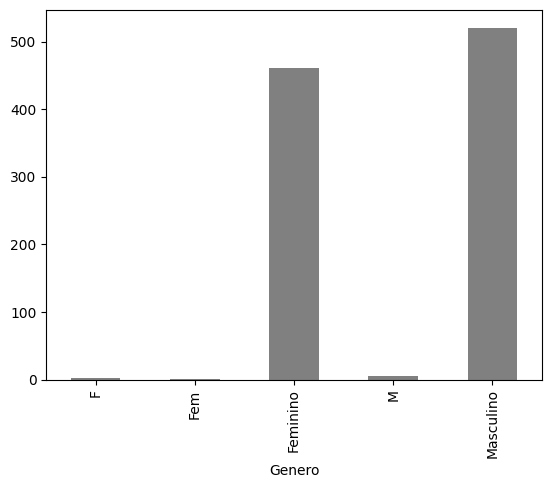

In [8]:
agrupado = dataset.groupby(['Genero']).size()
print(agrupado)
agrupado.plot.bar(color = 'gray')

# Explorando as colunas numéricas por meio do Boxplot e gráfico de distribuição normal (Gaussiano)

Esse comando retornas métricas de estatísticas descritivas. Média, desvio padrão, máximo, mínimo, quartil e quantidade.  

**Contagem(count):** *número de valores na coluna "Score".*  
**Média(mean):** *A média aritmética da coluna "Score".*  
**Desvio Padrão:** *O desvio padrão dos valores na coluna "Score", que mede a dispersão dos dados em torno da média. Quanto maior o desvio padrão, mais os valores tendem a se afastar da média.*  
**Valor mínimo:** *O valor mínimo na coluna "Score", ou seja, o menor valor presente nos dados.*  
**25% (Q1):** *O primeiro quartil, que é o valor abaixo de qual 25% dos dados estão localizados. É também conhecido como o primeiro quartil inferior. *  
**50% (Q2):** *O segundo quartil, que é a mediana dos dados. É o valor que divide o conjunto de dados em duas metades iguais, com 50% dos dados abaixo e 50% acima desse valor.*  
**75% (Q3):** *O terceiro quartil, que é o valor abaixo do qual 75% dos dados estão localizados. É também conhecido como o terceiro quartil superior.*  
**Valor Máximo (max):** *O valor máximo na coluna "Score", ou seja, o maior valor presente nos dados.*

In [10]:
dataset['Score'].describe()



count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

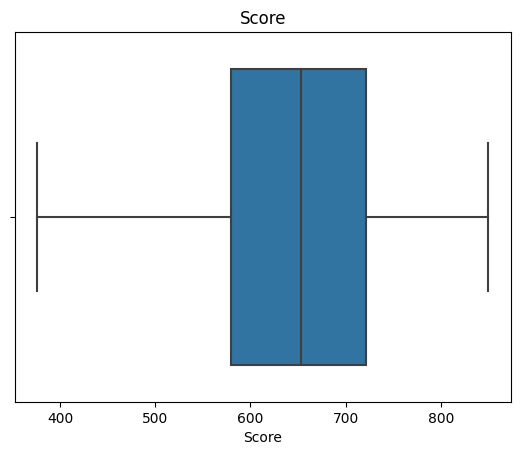

In [11]:
srn.boxplot(x=dataset['Score']).set_title('Score')

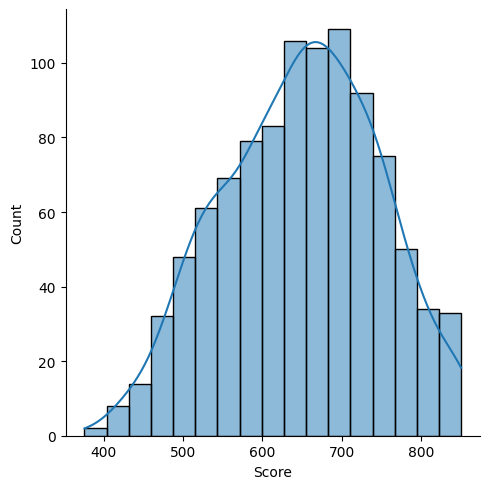

In [12]:
srn.displot(x=dataset['Score'], kde=True)

Realizando os mesmos procedimentos para as colunas **Idade, Saldo e Salário.**

# Idade

In [14]:
dataset['Idade'].describe()



count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

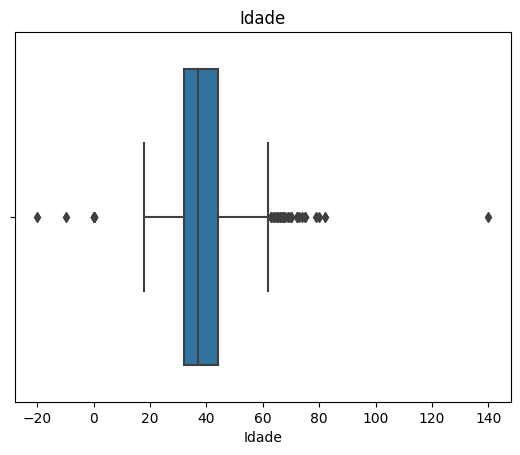

In [15]:
srn.boxplot(x=dataset['Idade']).set_title('Idade')

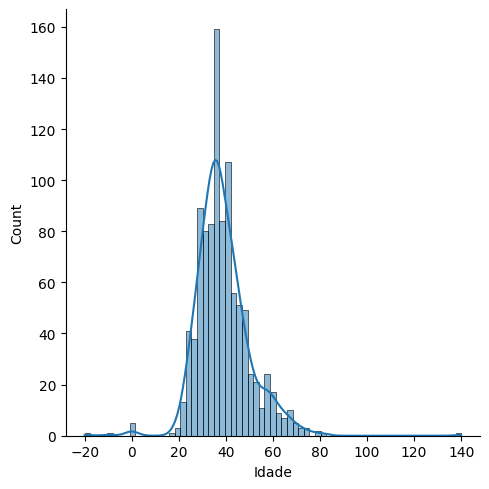

In [16]:
srn.displot(x=dataset['Idade'], kde=True)

# Saldo

In [17]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

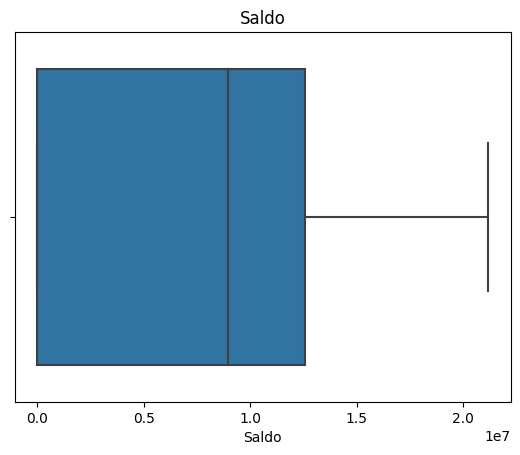

In [18]:
srn.boxplot(x=dataset['Saldo']).set_title('Saldo')

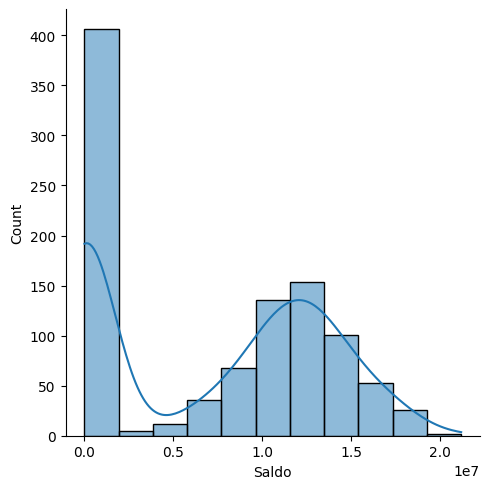

In [19]:
srn.displot(x=dataset['Saldo'], kde=True)

# Salário

In [20]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

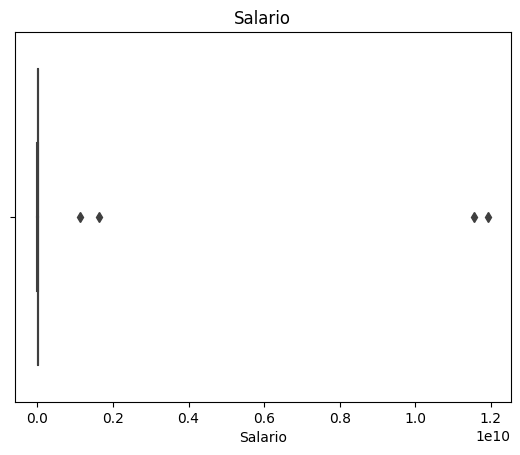

In [21]:
srn.boxplot(x=dataset['Salario']).set_title('Salario')

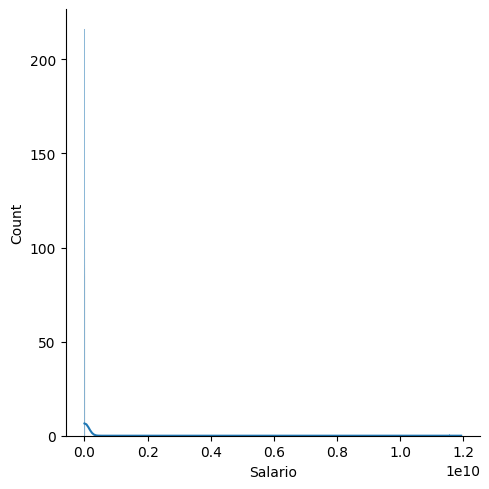

In [22]:
srn.displot(x=dataset['Salario'], kde=True)

# Essa etapa do código iremos contar os valores faltantes ou NAN's para Salário e Gênero

# Salário

In [23]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Calculando mediana

In [24]:
mediana = sts.median(dataset['Salario'])
print(mediana)

70518.0


*Note que a mediana utilizando a biblioteca STATISTCS deu diferente da calculada  na função describe. Pois, a primeira leva em consideração os valores faltantes.*

A função seguinte substitui as NAN's pela mediana.

In [26]:
dataset['Salario'].fillna(mediana, inplace=True)
dataset['Salario'].isnull().sum() # Verifica se ainda existe NAN's

0

In [27]:
mediana = sts.median(dataset['Salario'])
print(mediana)

8641028.0


Por fim, veja que depois de substituir os valores faltantes da coluna salário pela mediana e, calcular novamente a mediana por meio da função (sts.media) os valor é aproximadamente igual ao da tabela. (50%)

## Falta de padronização e NAN's

In [29]:
agrupado = dataset.groupby(['Genero']).size()
print(agrupado)

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64


 Essa função abaixo retorna a quantidade de linhas com 'zeros'

In [30]:
dataset['Genero'].isnull().sum()

8

Se observarmos a tabela acima, veremos que a moda corresponde à Masculino. Dessa forma, substituiremos as NAN's pela moda na coluna gênero

In [31]:
dataset['Genero'].fillna('Masculino', inplace=True)

In [32]:
dataset['Genero'].isnull().sum() # Verifica novamente a quantidade de NAN's

0

Nessa parte padronizaremos a coluna Gênero. Veja na tabela acima que existem outliers do tipo (F, Fem e M). Aqui padroniza para Feminino e Masculino

In [35]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino" # Troca M para Masculino
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino' # isin -> Dois valores na linha.
                                                                        # Troca os valores F e Fem para Feminino
agrupado = dataset.groupby(['Genero']).size()
print(agrupado)

Genero
Feminino     464
Masculino    535
dtype: int64


Essa parte do código trata os dados referente a Idades. Veja que existe alguns outliers, como a idade 140 anos.

In [36]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Visualiza os pontos onde: 100 < idade OU idade < 0

In [37]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [38]:
# Calcular a mediana
mediana = sts.median(dataset['Idade'])
print(mediana)

37


In [39]:
# Substitui os outliers pela mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100), 'Idade'] = mediana

In [41]:
# Verificando se ainda existe idades fora do dominio
dataset.loc[(dataset['Idade'] < 0) |(dataset['Idade'] > 100)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [42]:
# Verifica se existe dados duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [44]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Tratando os Dados referente a coluna ESTADO

In [45]:
agrupado = dataset.groupby(['Estado']).size()
print(agrupado)

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64


Substitui os outliers pela MODA

In [46]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()
print(agrupado)


Estado
PR    257
RS    483
SC    258
dtype: int64


Tratadando os dados refeentes a salário.

Cálculo do Desvio Padrão referente a coluna salário.

In [47]:
desv = sts.stdev(dataset['Salario'])
print(desv)

528988918.4679201


Aqui calcula as linhas que têm o desvio padrão maior ou igual que duas vezes

In [48]:
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


Calculando a mediana

In [49]:
mediana = sts.median(dataset['Salario'])
print(mediana)



8637195.5


Substituindo esses valores pela mediana

In [50]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

In [51]:
dataset.loc[dataset['Salario'] >= 2 * desv ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [52]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [53]:
dataset.shape

(998, 12)